In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
dataset= pd.read_csv('D:/data/dataset.csv', encoding = "ISO-8859-1")

In [3]:
dataset.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,1 Follower
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,Its true that insurance is a services based in...,7 Reviews,6 Followers
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,28 Followers
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to cust...",1 Review,NaN


In [4]:
dataset.describe()

,Rating
count,130.000000
mean,1.700000
std,1.267666
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [5]:
#removing the unwanted strings from numerical columns
dataset['Total_reviews_by_customer'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dataset['Views'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
dataset['Customer_follower'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [6]:
dataset.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558,Third class service and they are cheaters. Nev...,2,1
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548,Its true that insurance is a services based in...,7,6
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311,I have taken a Metlife policy in 2008 August w...,1,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309,Scene 1 : A lady weeping besides the dead body...,15,28
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480,"Once policy created, no one look back to cust...",1,NaN


In [7]:
 dataset['date_time']=pd.to_datetime(dataset['date_time'])

In [8]:
dataset.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,2014-04-22 17:22:00,9558,Third class service and they are cheaters. Nev...,2,1
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,2006-03-13 21:41:00,3548,Its true that insurance is a services based in...,7,6
2,Metlife is the worst insurance company,lijok,Kochi India,1,2013-06-04 09:08:00,9311,I have taken a Metlife policy in 2008 August w...,1,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,2004-10-14 14:06:00,15309,Scene 1 : A lady weeping besides the dead body...,15,28
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,2017-05-31 19:30:00,3480,"Once policy created, no one look back to cust...",1,NaN


In [9]:
#changing the digits data columns from string to numbers
dataset['Views']=pd.to_numeric(dataset['Views'], errors='coerce')
dataset['Total_reviews_by_customer']=pd.to_numeric(dataset['Total_reviews_by_customer'], errors='coerce')
dataset['Customer_follower']=pd.to_numeric(dataset['Customer_follower'], errors='coerce')

In [10]:
dataset.describe()

,Rating,Views,Total_reviews_by_customer,Customer_follower
count,130.000000,128.000000,128.000000,42.000000
mean,1.700000,7313.921875,16.390625,18.619048
std,1.267666,3760.669394,57.658817,42.818364
min,1.000000,168.000000,1.000000,1.000000
25%,1.000000,3989.000000,1.000000,1.000000
50%,1.000000,7781.000000,1.000000,3.500000
75%,2.000000,10173.500000,5.000000,12.500000
max,5.000000,15309.000000,440.000000,250.000000


In [11]:
# Now filling the missing values from these respective column
# after checking the data we are going to remove the rows which have NaN values in most no. of columns

In [12]:
col_list=['Views','Total_reviews_by_customer','Location']
dataset.dropna(subset=col_list,inplace=True)

In [13]:
dataset.describe()

,Rating,Views,Total_reviews_by_customer,Customer_follower
count,128.000000,128.000000,128.000000,42.000000
mean,1.710938,7313.921875,16.390625,18.619048
std,1.274538,3760.669394,57.658817,42.818364
min,1.000000,168.000000,1.000000,1.000000
25%,1.000000,3989.000000,1.000000,1.000000
50%,1.000000,7781.000000,1.000000,3.500000
75%,2.000000,10173.500000,5.000000,12.500000
max,5.000000,15309.000000,440.000000,250.000000


In [14]:
dataset['Customer_follower'].fillna(value=0, inplace=True)

In [15]:
dataset.describe()

,Rating,Views,Total_reviews_by_customer,Customer_follower
count,128.000000,128.000000,128.000000,128.000000
mean,1.710938,7313.921875,16.390625,6.109375
std,1.274538,3760.669394,57.658817,25.863431
min,1.000000,168.000000,1.000000,0.000000
25%,1.000000,3989.000000,1.000000,0.000000
50%,1.000000,7781.000000,1.000000,0.000000
75%,2.000000,10173.500000,5.000000,1.000000
max,5.000000,15309.000000,440.000000,250.000000


In [16]:
#As most of the customers are from india so removing the country name from the Loaction column
dataset['Location']=dataset['Location'].str.replace('India','',case=False)

In [17]:
dataset.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore,1,2014-04-22 17:22:00,9558.0,Third class service and they are cheaters. Nev...,2.0,1.0
1,"Well, think again!!!!!",deekshasethi,new delhi,4,2006-03-13 21:41:00,3548.0,Its true that insurance is a services based in...,7.0,6.0
2,Metlife is the worst insurance company,lijok,Kochi,1,2013-06-04 09:08:00,9311.0,I have taken a Metlife policy in 2008 August w...,1.0,0.0
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai,4,2004-10-14 14:06:00,15309.0,Scene 1 : A lady weeping besides the dead body...,15.0,28.0
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore,1,2017-05-31 19:30:00,3480.0,"Once policy created, no one look back to cust...",1.0,0.0


In [18]:
dataset['Location'].value_counts()

Bangalore                  22
                           16
Hyderabad                   5
Delhi                       5
bangalore                   5
Mumbai                      5
New Delhi                   3
#NAME?                      3
Noida                       2
mumbai                      2
Chennai                     2
Trichy                      2
Mumbai, Maharashtra,        2
Pune                        2
New Delhi,                  2
Gurgaon                     2
new delhi                   2
Bangalore Inida             1
Dwarka                      1
kolkata                     1
Ajmer                       1
gurgaon                     1
Mangalore                   1
Allahabad,                  1
chennai                     1
Morinda                     1
Bhadra                      1
Jaipur                      1
Hubli                       1
Vijayawada                  1
                           ..
Kharagpur                   1
Kochi                       1
Bangalore 

In [20]:
#droping the Customer name column as it does not provides much information
del dataset['Customer']

In [21]:
dataset.head()

,subject,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,Bangalore,1,2014-04-22 17:22:00,9558.0,Third class service and they are cheaters. Nev...,2.0,1.0
1,"Well, think again!!!!!",new delhi,4,2006-03-13 21:41:00,3548.0,Its true that insurance is a services based in...,7.0,6.0
2,Metlife is the worst insurance company,Kochi,1,2013-06-04 09:08:00,9311.0,I have taken a Metlife policy in 2008 August w...,1.0,0.0
3,HAVE U MET LIFE TODAY??????,mumbai,4,2004-10-14 14:06:00,15309.0,Scene 1 : A lady weeping besides the dead body...,15.0,28.0
4,Irresponsible persons working over there in PNB,Bengaluru/ Bangalore,1,2017-05-31 19:30:00,3480.0,"Once policy created, no one look back to cust...",1.0,0.0


In [22]:
#initializing the variable to check polarity
positive=0
negative= 0
neutral= 0
polarity=0

In [23]:
sentiments=[]
for comp in dataset['complaint']:
    analysis= TextBlob(comp)
    sentiments.append(analysis.sentiment.polarity)
    polarity+= analysis.sentiment.polarity
    if (analysis.sentiment.polarity==0):
        neutral+= 1
    elif(analysis.sentiment.polarity<0.00):
        negative+= 1
    elif(analysis.sentiment.polarity>0.00):
        positive+= 1
dataset['sentiments']=sentiments

In [24]:
#function to calculate percentage
def percentage(part, whole):
    return 100 *float(part)/float(whole)

In [25]:
positive= percentage(positive,len(dataset['complaint']))
negative= percentage(negative,len(dataset['complaint']))
neutral= percentage(neutral,len(dataset['complaint']))
#fromating the variables
positive= format(positive,'.2f')
negative= format(negative,'.2f')
neutral= format(neutral,'.2f')

In [26]:
print('By analyzing '+str(len(dataset['complaint']))+' complaints, sentiments about PNB Metlife is:')
if (polarity == 0):
    print("Neutral")
elif(polarity < 0):
    print("Negative")
elif(polarity > 0):
    print("Positive")

By analyzing 128 complaints, sentiments about PNB Metlife is:
Negative


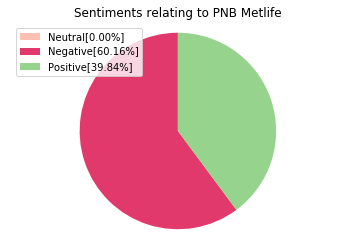

In [27]:
# creating a pie plot of the result obtained
labels=['Neutral['+str(neutral)+'%]','Negative['+str(negative)+'%]','Positive['+str(positive)+'%]']
sizes=[neutral,negative,positive,]
colors=['#FEBFB3','#E1396C','#96D38C']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.title('Sentiments relating to PNB Metlife')
plt.axis('equal')
plt.show()

In [28]:
#AS we can see from the above chart most of the sentiments is negative towards PNB metlife

D:\ProgramFiles\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


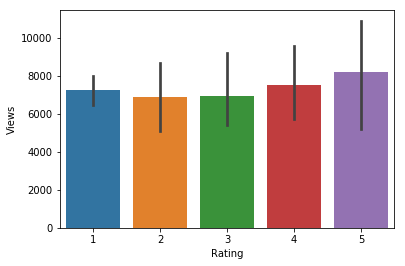

In [29]:
sns.barplot(x="Rating", y="Views", data=dataset)

In [30]:
#from the above graph we can conclude that most of the views are on 5 star rating.
#but we can also see that users are mostly concern with exreame ratings.


## this analysis is not Complete

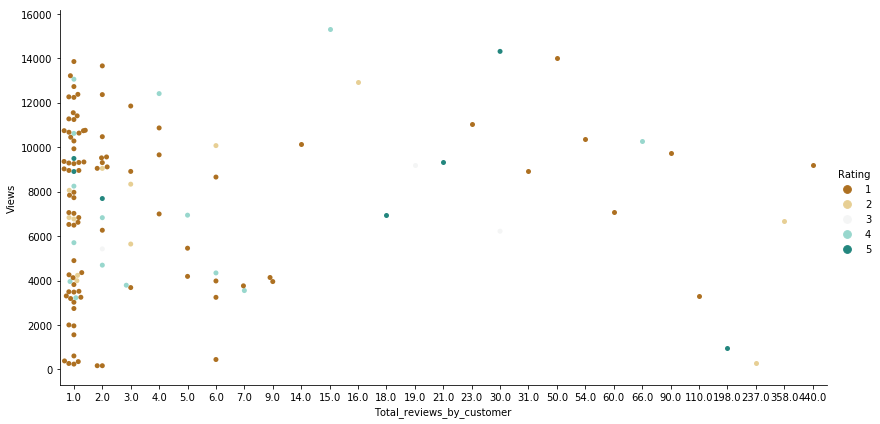

In [31]:
sns.catplot(data=dataset, x='Total_reviews_by_customer', y='Views', hue='Rating',kind='swarm',
            palette=("BrBG"), height=6, aspect=11.7/6)

In [ ]:
# from the above plot we can conclude that most of the users reviewing for the first time have given 1 star rating.
#this shows that companies performance is not even okay as so many users have 
#taken to their time to rewiew for forst time and are sevierly unhappy with the company.



In [38]:
dataset

,subject,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower,sentiments,polarity
0,Cheaters,Bangalore,1,2014-04-22 17:22:00,9558.0,Third class service and they are cheaters. Nev...,2.0,1.0,-0.195312,-1
1,"Well, think again!!!!!",new delhi,4,2006-03-13 21:41:00,3548.0,Its true that insurance is a services based in...,7.0,6.0,0.085578,1
2,Metlife is the worst insurance company,Kochi,1,2013-06-04 09:08:00,9311.0,I have taken a Metlife policy in 2008 August w...,1.0,0.0,-0.212401,-1
3,HAVE U MET LIFE TODAY??????,mumbai,4,2004-10-14 14:06:00,15309.0,Scene 1 : A lady weeping besides the dead body...,15.0,28.0,0.137334,1
4,Irresponsible persons working over there in PNB,Bengaluru/ Bangalore,1,2017-05-31 19:30:00,3480.0,"Once policy created, no one look back to cust...",1.0,0.0,-0.131250,-1
5,So far so good,Chennai,4,2011-04-14 11:59:00,4692.0,My requirement:\nIam Vijay aged 29. I was look...,2.0,0.0,0.040305,1
6,Pnb Metlife,Dwarka,5,2018-09-28 17:27:00,952.0,PNB metlife insurance befits are good they gav...,198.0,46.0,0.158750,1
7,Evaluate carefully before choosing!,banglaore,2,2014-02-24 12:15:00,8334.0,Evaluate carefully before choosing.\nDo not fa...,3.0,0.0,0.116899,1
8,HEAVY LOSSES ON PNB METSMART PLATINUM- NEVERBUY!!,Delhi,1,2015-09-09 14:24:00,9355.0,I am a life insurance policy holder of PNB Met...,1.0,1.0,-0.288611,-1
9,Metlife India Life Insurance premium hassles,Chandigarh,2,2009-06-08 18:38:00,4234.0,I would like to share my experience with all y...,1.0,0.0,0.001585,1


In [47]:
pol=[]
for row in dataset['sentiments']:
    if row < 0.0:
        pol.append('Strongly Negative')
    elif row < 0.05:
        pol.append('Negative')
    elif row > 0.1:
        pol.append('Positive')
    elif row > 0.3:
        pol.append('Strongly Positive')
    else:
        pol.append('Not Sure')
dataset['polarity']=pol        

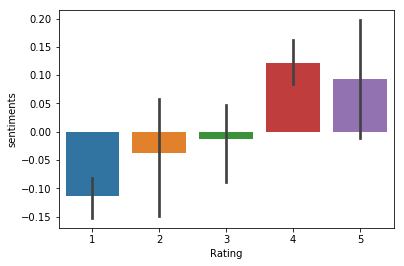

In [34]:
sns.barplot(x="Rating", y="sentiments", data=dataset)

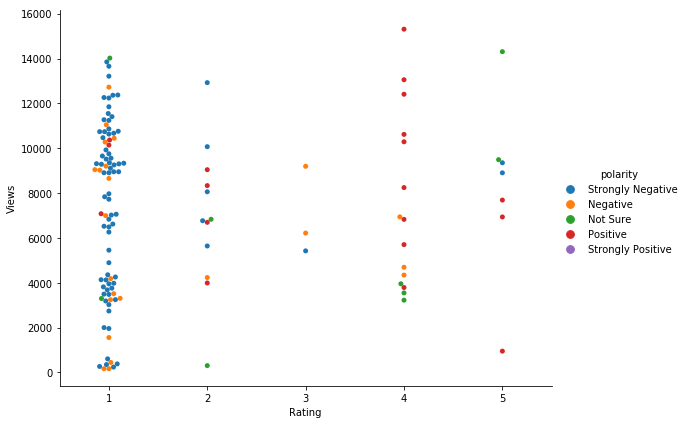

In [49]:
sns.catplot(data=dataset, x='Rating', y='Views', hue='polarity',kind='swarm',
             height=6, aspect=8/6,hue_order=['Strongly Negative','Negative','Not Sure','Positive','Strongly Positive'])

In [ ]:
# from the above graph we can see that few of the data points being negative have given 5 star.
# these people want to target the audiance which are there to see positve about the company.
#they are more dangerous as they can dissuade a positive attitude person against the company.